# Random Forest Classifier (BERT-Boosted) x Toxic Content Detection
Il presente Notebook mostra l'addestramento ed il testing di un Classificatore basato su Random Forest per il task di Toxic Content Detection utilizzando BERT come feature extractor.

I dati sono stati processati come segue:
1. Pulizia del testo (si veda 'dataset_preprocessing.py')
2. Estrazione delle Features mediante BERT (si veda 'feature_extraction_bert_windows.ipynb'/'feature_extraction_bert_mac.ipynb')

In [7]:
import pandas as pd
import numpy as np
import pickle
import nltk
import re
import torch
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertModel
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, ConfusionMatrixDisplay

## Caricamento del Training Set

In [2]:
training_set = pd.read_csv("./../../datasets/training_set.csv")

# Osservazione: il Training Set è stato già ripulito
training_set

,comment_text,toxic
0,cocksucker before you piss around on my work,1
1,hey what is it talk what is it an exclusive gr...,1
2,bye dont look come or think of comming back to...,1
3,you are gay or antisemmitian archangel white t...,1
4,fuck your filthy mother in the ass dry,1
...,...,...
30572,chris i dont know who you are talking to but i...,0
30573,operation condor is also named a dirty war can...,0
30574,there is no evidence that this block has anyth...,0
30575,thanks hey utkarshraj thanks for the kindness ...,0


In [3]:
y_train = training_set['toxic']

# Addestramento del Sistema
Il Sistema è ovviamente riaddestrabile a piacere. Si consiglia, tuttavia, dato il tempo necessario per riaddestrare il classificatore, di utilizzare il file pickle 'rf_classifier' per eseguire subito gli esperimenti.

In [10]:
X_train = pd.read_csv("./../../datasets/X_train_bert.csv")
print("X_train.shape", X_train.shape)

X_train.shape (30577, 768)


In [5]:
n_estimators = 500
model_filename = 'rf_classifier_{}.pkl'.format(n_estimators)
cl = None

Esegui la seguente sottosezione per riaddestrare il Classificatore da capo. Il modello ottenuto verrà persistito nel file 'rf_classifier.pkl'.

In [8]:
cl = RandomForestClassifier(n_estimators=n_estimators, random_state=24)

In [12]:
print("Estimators: " + str(n_estimators))
print("Training started...")
start = datetime.now()
cl.fit(X=X_train, y=y_train)
end = datetime.now()
print("Training completed! Required time: " + str(end-start))

Estimators: 500
Training started...
Training completed! Required time: 0:06:22.590912


In [15]:
with open(model_filename, 'wb') as f:
    pickle.dump(cl, f)

Esegui la seguente sottosezione per utilizzare il Classificatore già addestrato.

In [16]:
with open(model_filename, 'rb') as f:
    cl = pickle.load(f)

# Testing del Sistema

In [18]:
test_data = pd.read_csv("./../../datasets/test_set.csv")
test_data.dropna(inplace=True)
test_set = test_data[test_data['toxic'] != -1]

In [19]:
y_test = test_set['toxic']
print("y_test.shape: " + str(y_test.shape))

y_test.shape: (63842,)


In [20]:
X_test = pd.read_csv("./../../datasets/X_test_bert.csv")
print("X_test.shape:", X_test.shape)

X_test.shape: (63842, 768)


Predizioni

In [21]:
y_pred = cl.predict(X_test)

#Metriche: Accuracy,Precision,Recall
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))

Accuracy: 0.8370665079414805
Precision: 0.35509436496742564
Recall: 0.8685723673402332


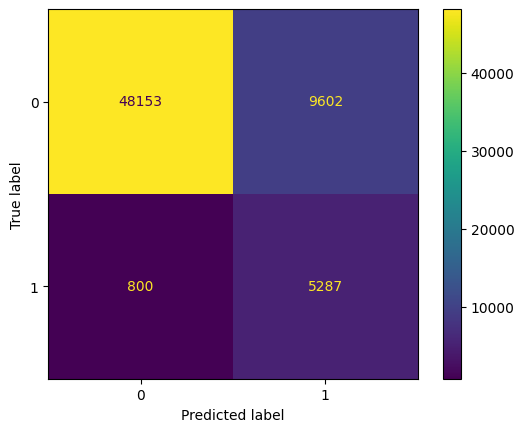

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cl.classes_)
disp.plot()
plt.show()